# Predict the Online News Popularity

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Dataset explore and wrangling

In [20]:
df = pd.read_csv("OnlineNewsPopularity.csv")

### Dataset info

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

There is no null input

In [22]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Remove white space the columns

In [23]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

Except for url, there is white space in all other columns names. It needs to be removed before further processing.  

In [24]:
#remove the white space in columns names
df.columns = df.columns.str.replace(' ', '')

In [52]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [56]:
df.to_csv(r"OnlineNewsPopularity-clean.csv")

### Check outlier of the dataset

In [26]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [27]:
df.describe().loc['std',:]

timedelta                           214.163767
n_tokens_title                        2.114037
n_tokens_content                    471.107508
n_unique_tokens                       3.520708
n_non_stop_words                      5.231231
n_non_stop_unique_tokens              3.264816
num_hrefs                            11.332017
num_self_hrefs                        3.855141
num_imgs                              8.309434
num_videos                            4.107855
average_token_length                  0.844406
num_keywords                          1.909130
data_channel_is_lifestyle             0.223929
data_channel_is_entertainment         0.382525
data_channel_is_bus                   0.364610
data_channel_is_socmed                0.234871
data_channel_is_tech                  0.388545
data_channel_is_world                 0.409129
kw_min_min                           69.633215
kw_max_min                         3857.990877
kw_avg_min                          620.783887
kw_min_max   

#### Check the outlier of 'timedelta' and 'n_tokens_content', because the stand deviation is large. 

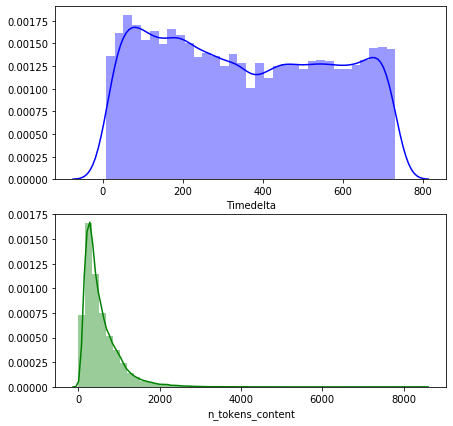

In [28]:
# Plot a historgram and kernel density estimate of timedelta and n_tokens_content

f, axes = plt.subplots(2, 1, figsize=(7, 7))

sns.distplot(df.timedelta,color='b',axlabel='Timedelta', ax=axes[0])
sns.distplot(df.n_tokens_content,color='g',axlabel='n_tokens_content', ax=axes[1])

There is no obvious outliers of timedelta and n_tokens_content. 

#### Check the outlier of shares

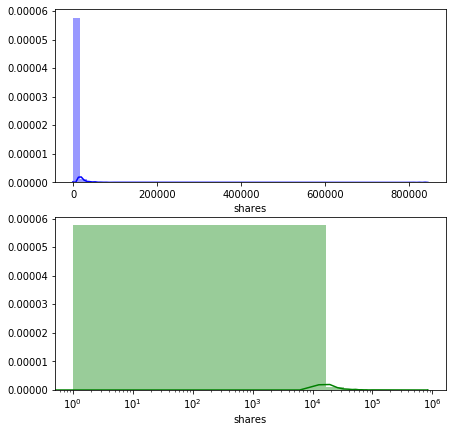

In [29]:
# Plot a historgram and kernel density estimate of shares

f, axes = plt.subplots(2, 1, figsize=(7, 7))

#plot at normal scale
sns.distplot(df.shares,axlabel='shares',color='b', ax=axes[0])

#plot at log-log scale
axes[1].set(xscale="log")
sns.distplot(df.shares,axlabel='shares',color='g', ax=axes[1])

In [30]:
#Remove record of share >=300000. 
df = df.loc[df.shares<200000]

In [31]:
# n_non_stop_words >1000
df = df.loc[df.n_non_stop_words<1000]

### Add 'weekday' and 'data_channel' columns to aggregate the info

#### Add Weekday column

In [32]:
#If there are two input of 1 for weekday, the input should be wrong and need to be dropped. 

In [33]:
#Check if sum of all weekday each record equals 1

df_weekday = df.loc[:,('weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday')]
(df_weekday.sum(axis=1)==1).value_counts()

True    39626
dtype: int64

All records are consistent

In [34]:
# create a weekday column, and fill it with ['Monday',...,'Sunday']

df.loc[(df.weekday_is_monday == 1), 'weekday'] = 'Monday'
df.loc[(df.weekday_is_tuesday == 1), 'weekday'] = 'Tuesday'
df.loc[(df.weekday_is_wednesday == 1), 'weekday'] = 'Wednesday'
df.loc[(df.weekday_is_thursday == 1), 'weekday'] = 'Thursday'
df.loc[(df.weekday_is_friday == 1), 'weekday'] = 'Friday'
df.loc[(df.weekday_is_saturday == 1), 'weekday'] = 'Saturday'
df.loc[(df.weekday_is_sunday == 1), 'weekday'] = 'Sunday'
df['weekday']

0           Monday
1           Monday
2           Monday
3           Monday
4           Monday
           ...    
39639    Wednesday
39640    Wednesday
39641    Wednesday
39642    Wednesday
39643    Wednesday
Name: weekday, Length: 39626, dtype: object

#### Create 'Data_channel' column

In [35]:
# Check if there is any collision for data_channel

df_data_channel = df.loc[:,('data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world')]
(df_data_channel.sum(axis=1)).value_counts()

1.0    33500
0.0     6126
dtype: int64

In [36]:
#There are records doesn't beloing to any data channel. Fill those records with 'Others'

df.loc[(df.data_channel_is_lifestyle == 1), 'data_channel'] = 'Lifestyle'
df.loc[(df.data_channel_is_entertainment == 1), 'data_channel'] = 'Entertainment'
df.loc[(df.data_channel_is_bus == 1), 'data_channel'] = 'Bus'
df.loc[(df.data_channel_is_socmed == 1), 'data_channel'] = 'Socmed'
df.loc[(df.data_channel_is_tech == 1), 'data_channel'] = 'Tech'
df.loc[(df.data_channel_is_world == 1), 'data_channel'] = 'World'
df.data_channel=df.data_channel.fillna(value='Others')

In [37]:
df.data_channel.value_counts()

World            8426
Tech             7345
Entertainment    7055
Bus              6253
Others           6126
Socmed           2323
Lifestyle        2098
Name: data_channel, dtype: int64

#### CDF plot

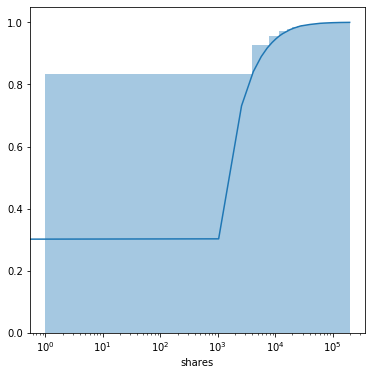

In [51]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.distplot(df.shares, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
ax.set(xscale="log")
plt.show()

Around 90% of articles were shared less than 6000 times. I would consider articles with more than 10000 shares are popular, which is top 10%. 

## Storytelling

### Explore the features that will affect shares

#### Timedelta

Timedelta is Days between the article publication and the dataset acquisition

Text(0, 0.5, 'Shares')

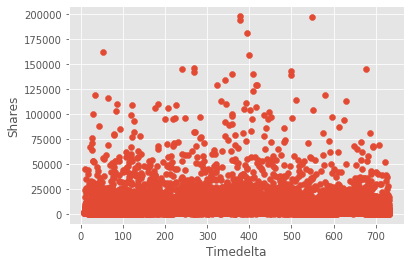

In [20]:
plt.style.use('ggplot')

# Show the number of shares as a function of timedaleta

plt.scatter(x=df.timedelta, y=df.shares)
plt.xlabel("Timedelta")
plt.ylabel("Shares")

There is no significant effect of timedelta. The shortest timedelta is 8 days, so most shares happens in 1 week. 

#### n_tokens_title

n_tokens_title is the Number of words in the title

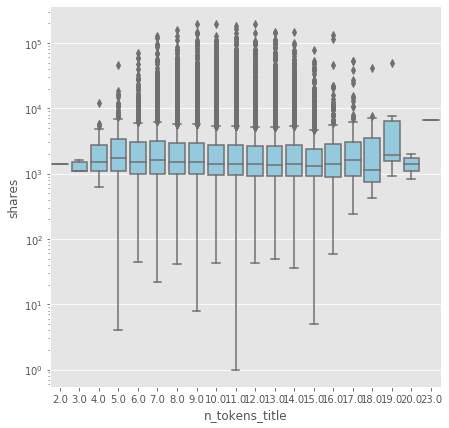

In [21]:
# Show the number of shares(log) as a function of n_tokens_title

f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
ax=sns.boxplot(x=df.n_tokens_title,y=df.shares,color='skyblue')

According to the mean, max and min of the box plot, there is not much effect of number of words in the title. There is only difference in outliear. 

It is a normal distribution. The top is in range (9,12). 

#### n_tokens_content, n_non_stop_words, n_unique_tokens and n_non_stop_unique_tokens

1. n_tokens_content is Number of words in the content
2. n_unique_tokens is Rate of unique words in the content
3. n_non_stop_words is Rate of non-stop words in the content
4. n_non_stop_unique_tokens is Rate of unique non-stop words in the

[None]

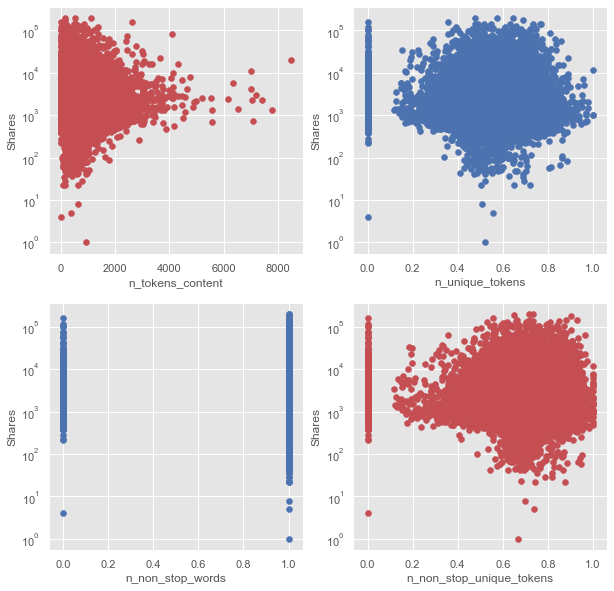

In [40]:
plt.style.use('ggplot')
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

# Show the number of shares as a function of n_tokens_content
ax1.scatter(x=df.n_tokens_content, y=df.shares,color='r')
ax1.set_xlabel("n_tokens_content")
ax1.set_ylabel("Shares")
ax1.set(yscale="log")

# Show the number of shares as a function of n_non_stop_words
ax3.scatter(x=df.n_non_stop_words, y=df.shares,color='b')
ax3.set_xlabel("n_non_stop_words")
ax3.set_ylabel("Shares")
ax3.set(yscale="log")
# Show the number of shares as a function of n_non_stop_unique_tokens
ax4.scatter(x=df.n_non_stop_unique_tokens, y=df.shares,color='r')
ax4.set_xlabel("n_non_stop_unique_tokens")
ax4.set_ylabel("Shares")
ax4.set(yscale="log")
# Show the number of shares as a function of n_non_unique_tokens
ax2.scatter(x=df.n_unique_tokens, y=df.shares,color='b')
ax2.set_xlabel("n_unique_tokens")
ax2.set_ylabel("Shares")
ax2.set(yscale="log")

#### num_hrefs and num_self_hrefs

1. num_hrefs is the number of links. 
2. num_self_hrefs is the number of links to other articles.

[None]

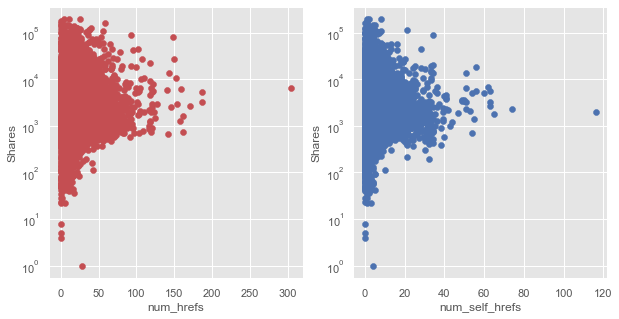

In [41]:
plt.style.use('ggplot')
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

# Show the number of shares as a function of num_hrefs
ax1.scatter(x=df.num_hrefs, y=df.shares,color='r')
ax1.set_xlabel("num_hrefs")
ax1.set_ylabel("Shares")
ax1.set(yscale="log")
# Show the number of shares as a function of num_self_hrefs
ax2.scatter(x=df.num_self_hrefs, y=df.shares,color='b')
ax2.set_xlabel("num_self_hrefs")
ax2.set_ylabel("Shares")
ax2.set(yscale="log")

#### num_imgs and num_videos

1. num_imgs is the number of images
2. num_videos is the number of videos

[None]

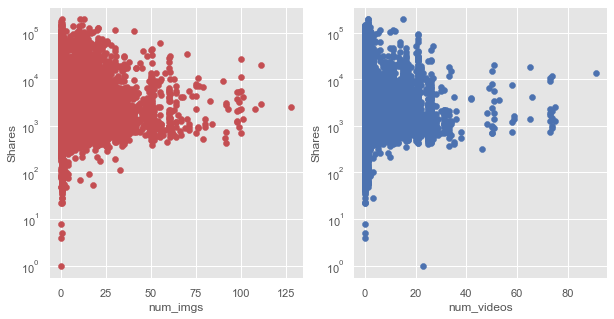

In [42]:
plt.style.use('ggplot')
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

# Show the number of shares as a function of num_imgs
ax1.scatter(x=df.num_imgs, y=df.shares,color='r')
ax1.set_xlabel("num_imgs")
ax1.set_ylabel("Shares")
ax1.set(yscale="log")
# Show the number of shares as a function of num_videos
ax2.scatter(x=df.num_videos, y=df.shares,color='b')
ax2.set_xlabel("num_videos")
ax2.set_ylabel("Shares")
ax2.set(yscale="log")

#### average_token_length

average_token_length is the average length of the words in the content


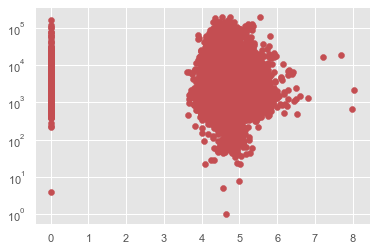

In [52]:
plt.style.use('ggplot')
plt.figure()
# Show the number of shares as a function of average_token_length
plt.scatter(x=df.average_token_length, y=df.shares,color='r')
plt.yscale('log')

The effect of average_token_length is norml distribution with peak around 5.5. But in general, the effect is small, because the range is small, which is from 4-6, and std is 0.84.

#### num_keywords

num_keywords is the number of keywords in the metadata

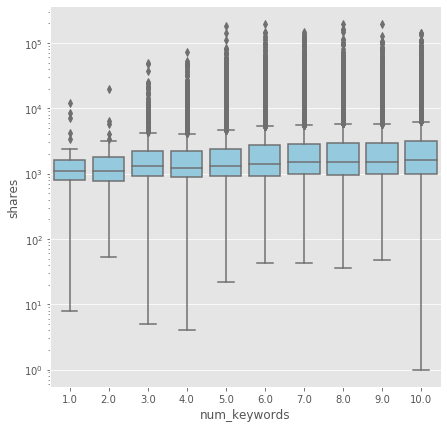

In [26]:
# Show the number of shares(log) as a function of num_keywords

f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
ax=sns.boxplot(x=df.num_keywords,y=df.shares,color='skyblue')

According to the mean, max and min of the box plot, there is ni much effect on shares for number of key words. 

#### data_channel

In [27]:
df.data_channel.value_counts()

World            8426
Tech             7345
Entertainment    7055
Bus              6253
Others           6126
Socmed           2323
Lifestyle        2098
Name: data_channel, dtype: int64

Data channel includes World, Tech, Entertainment, Bus, Socmed, Lifestyle. 

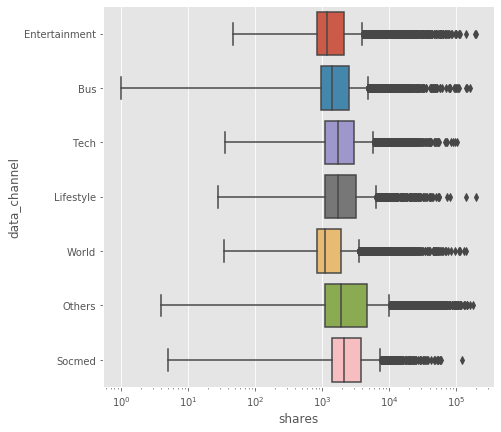

In [28]:
# Show the number of shares(log) as a function of data channel

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.boxplot(y=df.data_channel, x=df.shares,orient='h')

According to the mean of box, tech and world has better performance than world. Entertainment and lifestyle has large stand deviation. 

#### Weekday

Weekday through Monday to Sunday

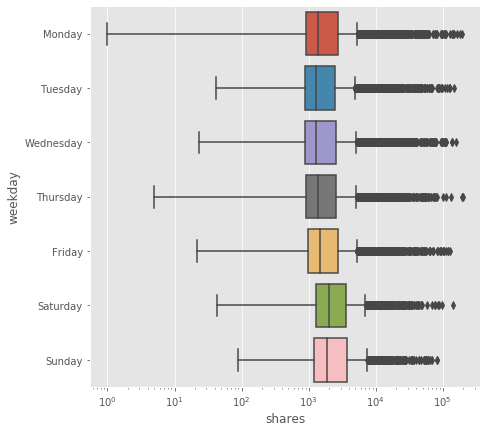

In [29]:
# Show the number of shares(log) as a function of data weekday

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.boxplot(y=df.weekday, x=df.shares,orient='h')

Weekend(Saturday and Sunday) have slightly more shares. 

#### global_subjectivity, global_sentiment_polarity, title_subjectivity, title_sentiment_polarity, abs_title_subjectivity and abs_title_sentiment_polarity

1. global_subjectivity is text subjectivity
2. global_sentiment_polarity is text sentiment polarity
3. title_subjectivity is title subjectivity
4. title_sentiment_polarity is title polarity
5. abs_title_subjectivity is absolute subjectivity level
6. abs_title_sentiment_polarity is absolute polarity level

[None]

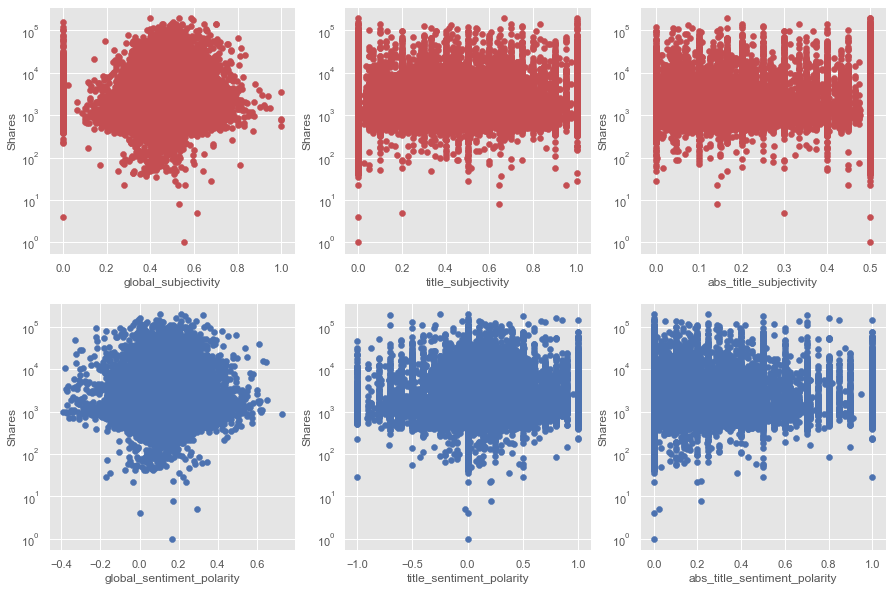

In [53]:
plt.style.use('ggplot')
fig, ((ax1, ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(15,10))

# Show the number of shares as a function of global_subjectivity
ax1.scatter(x=df.global_subjectivity, y=df.shares,color='r')
ax1.set_xlabel("global_subjectivity")
ax1.set_ylabel("Shares")
ax1.set(yscale="log")
# Show the number of shares as a function of global_sentiment_polarity
ax4.scatter(x=df.global_sentiment_polarity, y=df.shares,color='b')
ax4.set_xlabel("global_sentiment_polarity")
ax4.set_ylabel("Shares")
ax4.set(yscale="log")
# Show the number of shares as a function of title_subjectivity
ax2.scatter(x=df.title_subjectivity, y=df.shares,color='r')
ax2.set_xlabel("title_subjectivity")
ax2.set_ylabel("Shares")
ax2.set(yscale="log")
# Show the number of shares as a function of title_sentiment_polarity
ax5.scatter(x=df.title_sentiment_polarity, y=df.shares,color='b')
ax5.set_xlabel("title_sentiment_polarity")
ax5.set_ylabel("Shares")
ax5.set(yscale="log")
# Show the number of shares as a function of abs_title_subjectivity
ax3.scatter(x=df.abs_title_subjectivity, y=df.shares,color='r')
ax3.set_xlabel("abs_title_subjectivity")
ax3.set_ylabel("Shares")
ax3.set(yscale="log")
# Show the number of shares as a function of abs_title_sentiment_polarity
ax6.scatter(x=df.abs_title_sentiment_polarity, y=df.shares,color='b')
ax6.set_xlabel("abs_title_sentiment_polarity")
ax6.set_ylabel("Shares")
ax6.set(yscale="log")

The text sujectivity and sentiment polarity are normal distributed, and the peak is around 0.5 and 0.1 separately. There is no obvious effect of title sujectivity and sentiment_poarity. 

#### positive_polarity and negative_polarity

1. avg_positive_polarity: Avg. polarity of positive words
2. min_positive_polarity: Min. polarity of positive words
3. max_positive_polarity: Max. polarity of positive words
4. avg_negative_polarity: Avg. polarity of negative  words
5. min_negative_polarity: Min. polarity of negative  words
6. max_negative_polarity: Max. polarity of negative  words

[None]

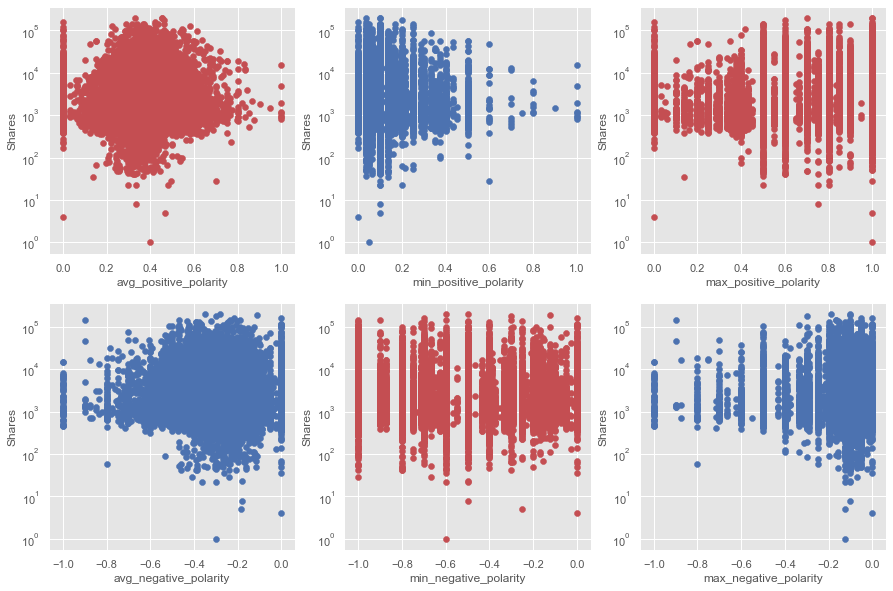

In [54]:
plt.style.use('ggplot')
fig, ((ax1, ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(15,10))

# Show the number of shares as a function of avg_positive_polarity
ax1.scatter(x=df.avg_positive_polarity, y=df.shares,color='r')
ax1.set_xlabel("avg_positive_polarity")
ax1.set_ylabel("Shares")
ax1.set(yscale="log")
# Show the number of shares as a function of min_positive_polarity
ax2.scatter(x=df.min_positive_polarity, y=df.shares,color='b')
ax2.set_xlabel("min_positive_polarity")
ax2.set_ylabel("Shares")
ax2.set(yscale="log")
# Show the number of shares as a function of max_positive_polarity
ax3.scatter(x=df.max_positive_polarity, y=df.shares,color='r')
ax3.set_xlabel("max_positive_polarity")
ax3.set_ylabel("Shares")
ax3.set(yscale="log")
# Show the number of shares as a function of avg_negative_polarity
ax4.scatter(x=df.avg_negative_polarity, y=df.shares,color='b')
ax4.set_xlabel("avg_negative_polarity")
ax4.set_ylabel("Shares")
ax4.set(yscale="log")
# Show the number of shares as a function of min_negative_polarity
ax5.scatter(x=df.min_negative_polarity, y=df.shares,color='r')
ax5.set_xlabel("min_negative_polarity")
ax5.set_ylabel("Shares")
ax5.set(yscale="log")
# Show the number of shares as a function of max_negative_polarity
ax6.scatter(x=df.max_negative_polarity, y=df.shares,color='b')
ax6.set_xlabel("max_negative_polarity")
ax6.set_ylabel("Shares")
ax6.set(yscale="log")

### Explore the coeffect of features

Some feature may have correlation between each other. It is better to minimize the correlation to avoid bias. 

#### Weekday+Topic

Is there any preferrence of articles published during workday and weekend?

In [32]:
#Prepare the pivot table for count of record, use weekday as index and data_channel as columns
weektopic = df.loc[:,('weekday','data_channel')].pivot_table(index='weekday',columns='data_channel',aggfunc=len)

(7.0, 0.0)

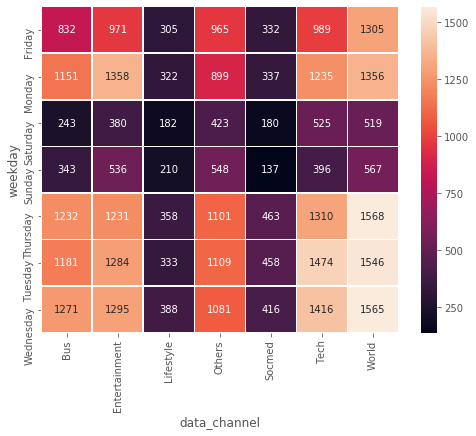

In [33]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(8, 6))

ax = sns.heatmap(weektopic, annot=True, fmt="d",linewidths=.5, ax=ax) 

# set the heatmap limits manually 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

There is no strong correlation between weekday and data channel. But we can find that there is less articles pubulished on Saturday and Sunday. Also, lifestyle and socmed articles are less than other topics. 

#### n_token_content, number_herfs, num_imgs, number_videos with topics

Accoring to previous result, n_token_content, number_herfs, num_imgs, number_videos has obvious impact on shares. Does the impact correct with data_channel?

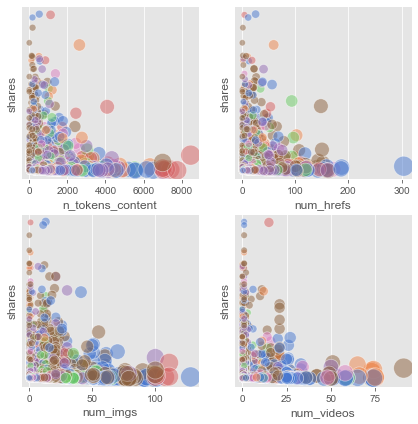

In [34]:
#initial the sns seting
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.set(style="white")

# Plot n_tokens_content against shares with data_channel
sns.relplot(x="n_tokens_content", y="shares", hue='data_channel', size="n_tokens_content",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df, ax=axes[0, 0])

# Plot num_hrefs against shares with data_channel
sns.relplot(x="num_hrefs", y="shares", hue='data_channel', size="num_hrefs",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df, ax=axes[0, 1])

# Plot num_imgs against shares with data_channel
sns.relplot(x="num_imgs", y="shares", hue='data_channel', size="num_imgs",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df, ax=axes[1, 0])

# Plot num_videos against shares with data_channel
sns.relplot(x="num_videos", y="shares", hue='data_channel', size="num_videos",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.close(5)
plt.close(2)
plt.close(3)
plt.close(4)
plt.show()

There is no obvious relationship with data_channel. 

#### n_token_content, number_herfs, num_imgs, number_videos with weekday

Does the impact correct with weekday?

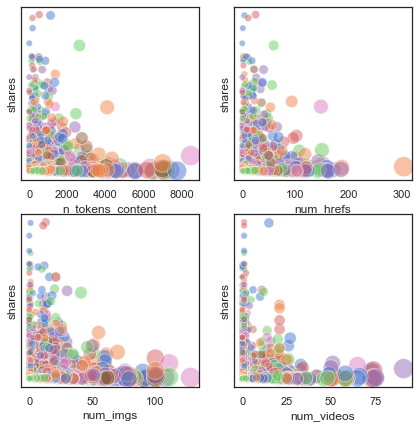

In [35]:
#initial the sns seting
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.set(style="white")

# Plot n_tokens_content against shares with weekday
sns.relplot(x="n_tokens_content", y="shares", hue='weekday', size="n_tokens_content",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df, ax=axes[0, 0])

# Plot num_hrefs against shares with weekday
sns.relplot(x="num_hrefs", y="shares", hue='weekday', size="num_hrefs",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df, ax=axes[0, 1])

# Plot num_imgs against shares with weekday
sns.relplot(x="num_imgs", y="shares", hue='weekday', size="num_imgs",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df, ax=axes[1, 0])

# Plot num_videos against shares with weekday
sns.relplot(x="num_videos", y="shares", hue='weekday', size="num_videos",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.close(5)
plt.close(2)
plt.close(3)
plt.close(4)
plt.show()

There is no obvious relationship with weekday.

### Correlation Heatmap

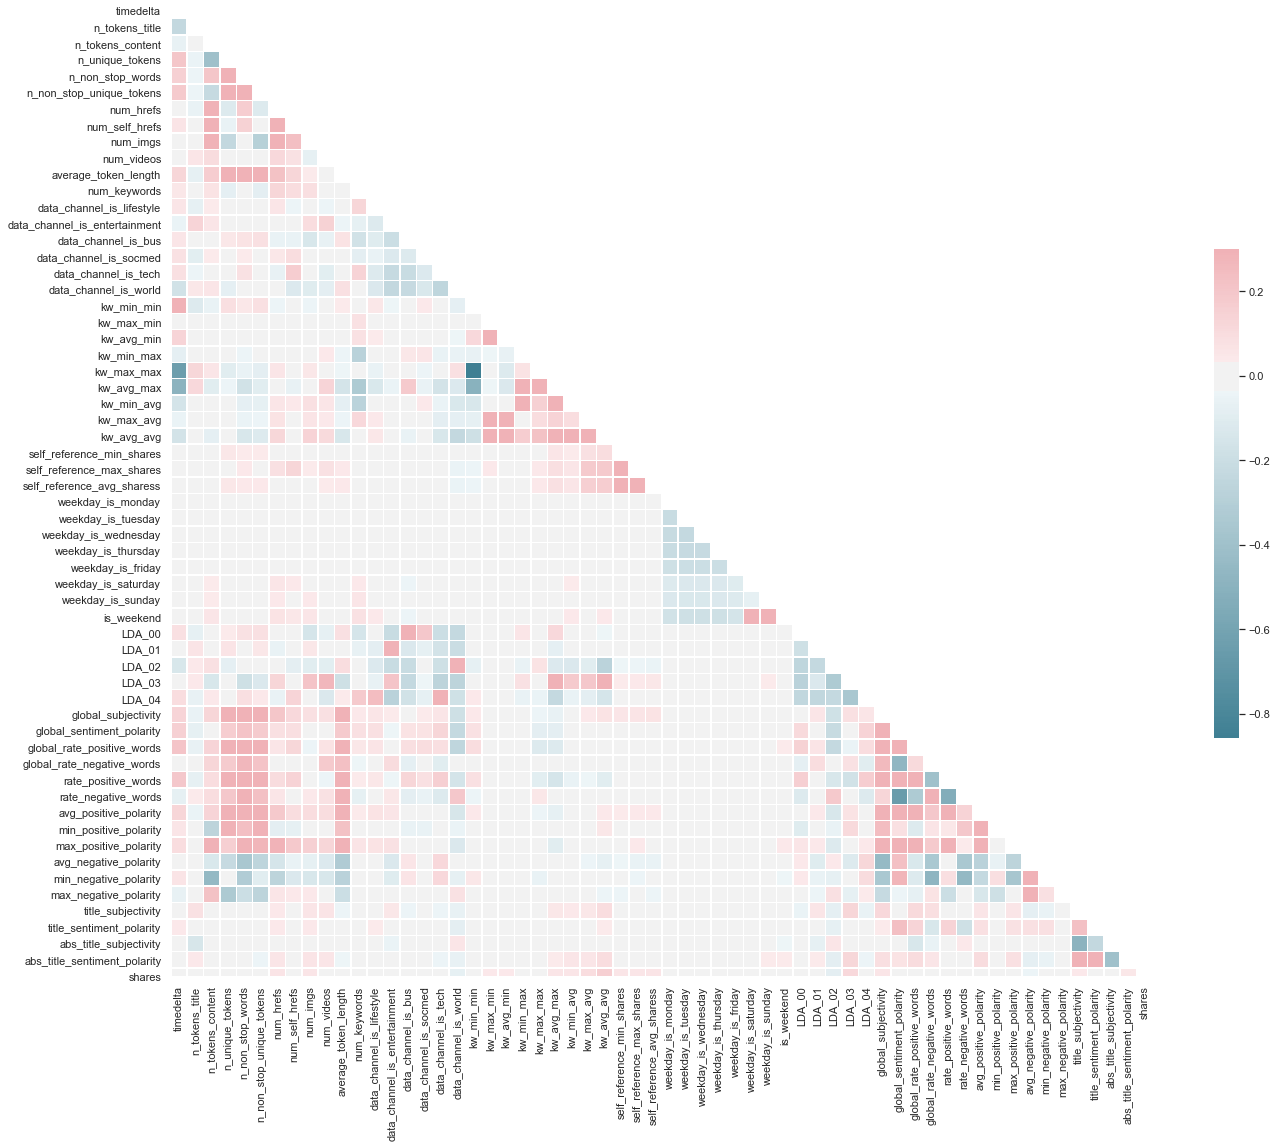

In [68]:
from string import ascii_letters

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},mask=mask)